In [1]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


In [2]:
# -----------------------------------
# Часть 1: Работа с датасетом breast cancer
# -----------------------------------

# 1. Завантажте вбудований датасет load_breast_cancer
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

In [3]:
# 2. Проведіть попередній аналіз даних
# 1. Перегляньте перші кілька рядків.
df_cancer = pd.DataFrame(X, columns=cancer_data.feature_names)
df_cancer['target'] = y
print("Перші 5 рядків датасету:")
print(df_cancer.head())

Перші 5 рядків датасету:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  wor

In [4]:
# 2. Перевірте назви стовпців та типи даних.
print("\nНазви стовпців та типи даних:")
print(df_cancer.info())


Назви стовпців та типи даних:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64


In [5]:
# 3. Перевірте наявність пропущених значень.
print("\nКількість пропущених значень:")
print(df_cancer.isnull().sum())


Кількість пропущених значень:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [6]:
# 4. Досліджуйте розмір даних.
print("\nРозмір датасету:")
print(df_cancer.shape)


Розмір датасету:
(569, 31)


In [7]:
# 2. Побудова і налаштування моделей
# 1. Розділіть дані на навчальний і тестовий набори.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Побудуйте три моделі класифікації
# 1. Логістична регресія
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [8]:
# 2. Дерево рішень
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# 3. Випадковий ліс
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# 3. Підберіть оптимальні параметри для кожної моделі за допомогою GridSearchCV
# Оптимізація логістичної регресії
param_grid_log_reg = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_log_reg, cv=5)
grid_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [10]:
# Оптимізація дерева рішень
param_grid_tree = {'max_depth': [None, 5, 10, 15]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15]})


Логістична регресія:
Точність: 0.9561
Матриця помилок:


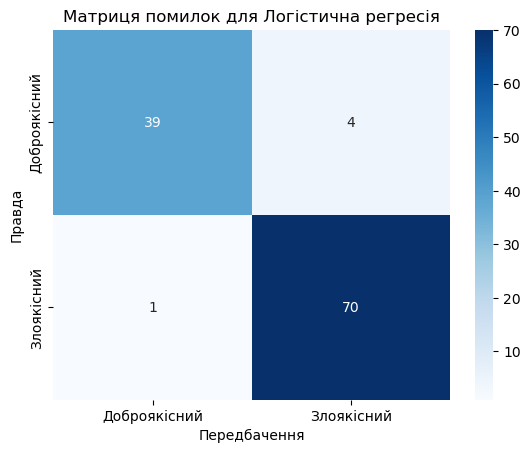

Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Дерево рішень:
Точність: 0.9386
Матриця помилок:


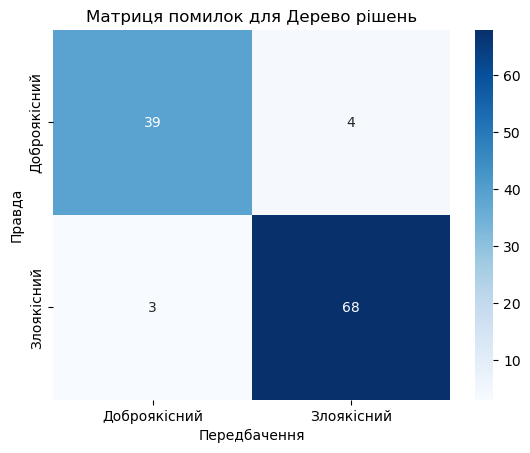

Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Випадковий ліс:
Точність: 0.9649
Матриця помилок:


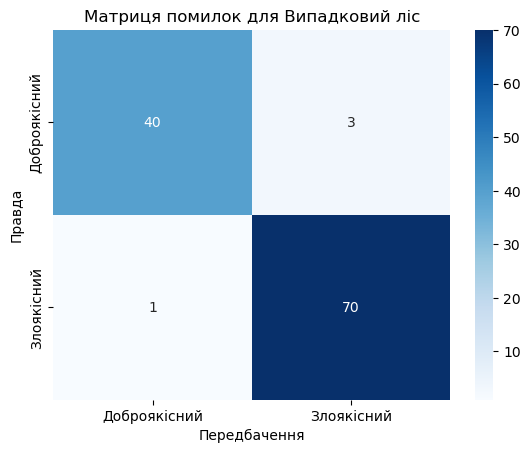

Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [12]:
# Оптимізація випадкового лісу
param_grid_forest = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid_forest, cv=5)
grid_forest.fit(X_train, y_train)

# 3. Оцініть моделі
models = [grid_log_reg, grid_tree, grid_forest]
model_names = ['Логістична регресія', 'Дерево рішень', 'Випадковий ліс']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print(f"\n{name}:")
    print(f"Точність: {accuracy:.4f}")
    print("Матриця помилок:")
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Доброякісний', 'Злоякісний'], yticklabels=['Доброякісний', 'Злоякісний'])
    plt.title(f'Матриця помилок для {name}')
    plt.xlabel('Передбачення')
    plt.ylabel('Правда')
    plt.show()
    print("Звіт про класифікацію:")
    print(class_report)

In [13]:
# 4. Прогнозування і висновки
# Оберіть найкращу модель на основі метрик продуктивності
best_model = max(models, key=lambda m: accuracy_score(y_test, m.predict(X_test)))
print("\nНайкраща модель:", best_model)

# Зробіть прогноз на тестовій вибірці
y_best_pred = best_model.predict(X_test)
print("\nРезультати прогнозування:")
print(y_best_pred)


Найкраща модель: GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [10, 50, 100]})

Результати прогнозування:
[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [28]:
# -----------------------------------
# Часть 2: Работа с датасетом Titanic
# -----------------------------------

# Загрузка датасета Titanic
titanic_data = pd.read_csv('titanic.csv')

# Попередній аналіз даних
print("\nПерші 5 рядків датасету Titanic:")
print(titanic_data.head())
print("\nОпис даних:")
print(titanic_data.info())


Перші 5 рядків датасету Titanic:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3

In [29]:
# Удалите ненужные столбцы
titanic_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True, errors='ignore')

# Проверка наличия категориальных признаков
print("\nСписок стовпців:")
print(titanic_data.columns)

# Обробка пропущених значень
titanic_data.fillna(method='ffill', inplace=True)

# Перетворення категоріальних ознак в числові
categorical_cols = ['Sex', 'Embarked']
for col in categorical_cols:
    if col in titanic_data.columns:
        print(f"{col} стовпець присутній у даних.")


Список стовпців:
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')
Sex стовпець присутній у даних.
Embarked стовпець присутній у даних.


In [30]:
# Перетворення категоріальних ознак в числові
titanic_data = pd.get_dummies(titanic_data, columns=categorical_cols, drop_first=True)

# Розділення на ознаки та цільову змінну
X_titanic = titanic_data.drop(['Survived'], axis=1)
y_titanic = titanic_data['Survived']

In [31]:
# Розділіть дані на навчальний і тестовий набори
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

# Побудуйте три моделі класифікації для датасету Titanic
# Логістична регресія
log_reg_titanic = LogisticRegression(max_iter=10000)
log_reg_titanic.fit(X_train_titanic, y_train_titanic)

LogisticRegression(max_iter=10000)

In [32]:
# Дерево рішень
decision_tree_titanic = DecisionTreeClassifier()
decision_tree_titanic.fit(X_train_titanic, y_train_titanic)

# Випадковий ліс
random_forest_titanic = RandomForestClassifier()
random_forest_titanic.fit(X_train_titanic, y_train_titanic)

RandomForestClassifier()

In [33]:
# Підберіть оптимальні параметри для кожної моделі за допомогою GridSearchCV
# Оптимізація логістичної регресії
param_grid_log_reg_titanic = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_log_reg_titanic = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_log_reg_titanic, cv=5)
grid_log_reg_titanic.fit(X_train_titanic, y_train_titanic)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [34]:
# Оптимізація дерева рішень
param_grid_tree_titanic = {'max_depth': [None, 5, 10, 15]}
grid_tree_titanic = GridSearchCV(DecisionTreeClassifier(), param_grid_tree_titanic, cv=5)
grid_tree_titanic.fit(X_train_titanic, y_train_titanic)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15]})

In [35]:
# Оптимізація випадкового лісу
param_grid_forest_titanic = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}
grid_forest_titanic = GridSearchCV(RandomForestClassifier(), param_grid_forest_titanic, cv=5)
grid_forest_titanic.fit(X_train_titanic, y_train_titanic)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [10, 50, 100]})


Логістична регресія для Titanic:
Точність: 0.7933
Матриця помилок:


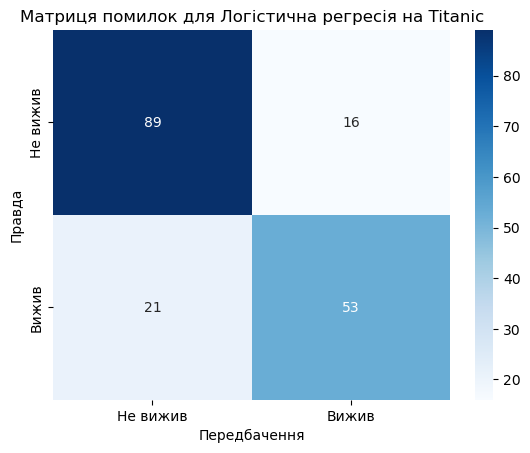

Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Дерево рішень для Titanic:
Точність: 0.7989
Матриця помилок:


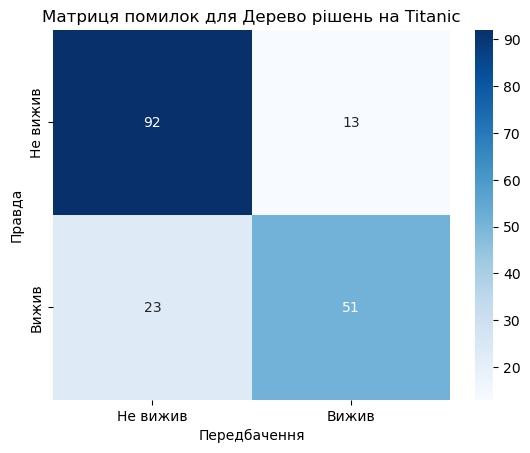

Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Випадковий ліс для Titanic:
Точність: 0.8045
Матриця помилок:


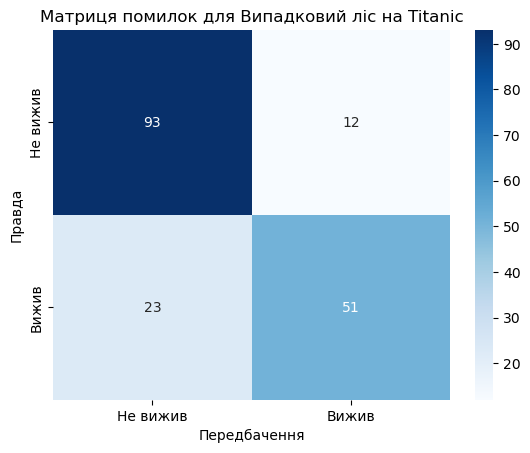

Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [36]:
# Оцінка моделей
titanic_models = [grid_log_reg_titanic, grid_tree_titanic, grid_forest_titanic]
titanic_model_names = ['Логістична регресія', 'Дерево рішень', 'Випадковий ліс']

for model, name in zip(titanic_models, titanic_model_names):
    y_pred_titanic = model.predict(X_test_titanic)
    accuracy_titanic = accuracy_score(y_test_titanic, y_pred_titanic)
    conf_matrix_titanic = confusion_matrix(y_test_titanic, y_pred_titanic)
    class_report_titanic = classification_report(y_test_titanic, y_pred_titanic)
    
    print(f"\n{name} для Titanic:")
    print(f"Точність: {accuracy_titanic:.4f}")
    print("Матриця помилок:")
    sns.heatmap(conf_matrix_titanic, annot=True, fmt='d', cmap='Blues', xticklabels=['Не вижив', 'Вижив'], yticklabels=['Не вижив', 'Вижив'])
    plt.title(f'Матриця помилок для {name} на Titanic')
    plt.xlabel('Передбачення')
    plt.ylabel('Правда')
    plt.show()
    print("Звіт про класифікацію:")
    print(class_report_titanic)

In [37]:
# Вибір найкращої моделі
best_model_titanic = max(titanic_models, key=lambda m: accuracy_score(y_test_titanic, m.predict(X_test_titanic)))
print("\nНайкраща модель для Titanic:", best_model_titanic)

# Прогноз для 10 випадків
sample_predictions = best_model_titanic.predict(X_test_titanic[:10])
print("\nРезультати прогнозування для 10 випадків:")
print(sample_predictions)


Найкраща модель для Titanic: GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [10, 50, 100]})

Результати прогнозування для 10 випадків:
[0 0 0 1 1 1 1 0 1 1]
